In [17]:
import geopandas as gpd
import numpy as np
import fiona
import pandas as pd
import matplotlib
import PIL 
import os

shapefile = gpd.read_file("SECC_CE_20160101.shp")
print(PIL.__file__)

C:\Users\csana\Anaconda3\lib\site-packages\PIL\__init__.py


In [18]:
import csv
csv.field_size_limit(100000000)

100000000

In [20]:
shapefile = shapefile[shapefile.NPRO=="Valencia/ValÃ©ncia"]
shapefile.to_file("SECC_CE_20160101.shp")
shapefile

,CUSEC,CUMUN,CSEC,CDIS,CMUN,CPRO,CCA,CUDIS,CLAU2,NPRO,...,CNUT3,NMUN,Shape_Leng,SUPERF_M2,Shape_Le_1,Shape_area,Shape_len,income,2,geometry
0,4600101001,46001,001,01,001,46,10,4600101,46001,Valencia/ValÃ©ncia,...,3,Ademuz,60898.350556,1.003939e+08,60898.350556,1.003939e+08,60898.350556,8470.0,8280.0,"POLYGON ((649558.761 4442124.122, 649591.766 4..."
1,4600201001,46002,001,01,002,46,10,4600201,46002,Valencia/ValÃ©ncia,...,3,Ador,34342.695961,1.382107e+07,34342.695961,1.382107e+07,34342.695961,9519.0,9345.0,"MULTIPOLYGON (((742830.273 4311878.568, 742851..."
2,4600301001,46003,001,01,003,46,10,4600301,46003,Valencia/ValÃ©ncia,...,3,Atzeneta d'Albaida,16775.485318,6.058295e+06,16775.485318,6.058295e+06,16775.485318,9054.0,8967.0,"POLYGON ((718561.047 4301660.533, 718655.054 4..."
3,4600401001,46004,001,01,004,46,10,4600401,46004,Valencia/ValÃ©ncia,...,3,Agullent,19901.389655,1.628180e+07,19901.389655,1.628180e+07,19901.389655,9367.0,9045.0,"POLYGON ((713485.976 4302368.529, 713229.006 4..."
4,4600501001,46005,001,01,005,46,10,4600501,46005,Valencia/ValÃ©ncia,...,3,AlaquÃ s,1027.289494,4.774462e+04,1027.289494,4.774462e+04,1027.289494,9939.0,9667.0,"POLYGON ((718453.552 4370863.347, 718461.333 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,4690301001,46903,001,01,903,46,10,4690301,46903,Valencia/ValÃ©ncia,...,3,San Antonio de BenagÃ©ber,14166.707339,5.476238e+06,14166.707339,5.476238e+06,14166.707339,13487.0,13014.0,"POLYGON ((715823.675 4383037.157, 715829.612 4..."
1752,4690301002,46903,002,01,903,46,10,4690301,46903,Valencia/ValÃ©ncia,...,3,San Antonio de BenagÃ©ber,3696.534241,5.847385e+05,3696.534241,5.847385e+05,3696.534241,11745.0,11478.0,"POLYGON ((715310.127 4381772.365, 715204.323 4..."
1753,4690301003,46903,003,01,903,46,10,4690301,46903,Valencia/ValÃ©ncia,...,3,San Antonio de BenagÃ©ber,6328.973146,1.418434e+06,6328.973146,1.418434e+06,6328.973146,17402.0,16896.0,"POLYGON ((716418.332 4381071.904, 716348.209 4..."
1754,4690301004,46903,004,01,903,46,10,4690301,46903,Valencia/ValÃ©ncia,...,3,San Antonio de BenagÃ©ber,2967.401121,4.854561e+05,2967.401121,4.854561e+05,2967.401121,13209.0,13004.0,"POLYGON ((714639.574 4381993.538, 714157.501 4..."


In [12]:
df = pd.read_csv(
    "Income_per_secciones.csv", delimiter=";", header=None,
    names=["CUSEC","income"], usecols=["CUSEC","income"],encoding = "ISO-8859-1");
df

,CUSEC,income
0,4625001001,14918
1,4625001002,16769
2,4625001003,16668
3,4625001005,17188
4,4625001007,21888
...,...,...
591,4625019012,8931
592,4625019013,9306
593,4625019014,8591
594,4625019015,9883


In [13]:
df = pd.read_csv(
    "30824sc.csv", delimiter=";", header=None,
    names=["CUSEC","income","2"], usecols=["CUSEC","income","2"],engine="python",quoting=csv.QUOTE_NONE);
df

,CUSEC,income,2
0,1001,13086.0,12936.0
1,1002,13691.0,13800.0
2,1003,17194.0,15786.0
3,1004,13185.0,12722.0
4,1006,11330.0,13040.0
...,...,...,...
50669,5200108011,16373.0,15926.0
50670,5200108012,17185.0,16792.0
50671,5200108013,12705.0,11823.0
50672,5200108014,8872.0,8937.0


In [14]:
shapefile.CUSEC = shapefile.CUSEC.astype(np.int64)
df.CUSEC.astype(np.int64)
shapefile = shapefile.merge(df, on='CUSEC')

In [16]:
shapefile

,CUSEC,CUMUN,CSEC,CDIS,CMUN,CPRO,CCA,CUDIS,CLAU2,NPRO,...,Shape_Leng,SUPERF_M2,Shape_Le_1,Shape_area,Shape_len,income_x,2_x,geometry,income_y,2_y
0,4600101001,46001,001,01,001,46,10,4600101,46001,Valencia/ValÃ©ncia,...,60898.350556,1.003939e+08,60898.350556,1.003939e+08,60898.350556,8470.0,8280.0,"POLYGON ((649558.761 4442124.122, 649591.766 4...",8470.0,8280.0
1,4600201001,46002,001,01,002,46,10,4600201,46002,Valencia/ValÃ©ncia,...,34342.695961,1.382107e+07,34342.695961,1.382107e+07,34342.695961,9519.0,9345.0,"MULTIPOLYGON (((742830.273 4311878.568, 742851...",9519.0,9345.0
2,4600301001,46003,001,01,003,46,10,4600301,46003,Valencia/ValÃ©ncia,...,16775.485318,6.058295e+06,16775.485318,6.058295e+06,16775.485318,9054.0,8967.0,"POLYGON ((718561.047 4301660.533, 718655.054 4...",9054.0,8967.0
3,4600401001,46004,001,01,004,46,10,4600401,46004,Valencia/ValÃ©ncia,...,19901.389655,1.628180e+07,19901.389655,1.628180e+07,19901.389655,9367.0,9045.0,"POLYGON ((713485.976 4302368.529, 713229.006 4...",9367.0,9045.0
4,4600501001,46005,001,01,005,46,10,4600501,46005,Valencia/ValÃ©ncia,...,1027.289494,4.774462e+04,1027.289494,4.774462e+04,1027.289494,9939.0,9667.0,"POLYGON ((718453.552 4370863.347, 718461.333 4...",9939.0,9667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,4690301001,46903,001,01,903,46,10,4690301,46903,Valencia/ValÃ©ncia,...,14166.707339,5.476238e+06,14166.707339,5.476238e+06,14166.707339,13487.0,13014.0,"POLYGON ((715823.675 4383037.157, 715829.612 4...",13487.0,13014.0
1752,4690301002,46903,002,01,903,46,10,4690301,46903,Valencia/ValÃ©ncia,...,3696.534241,5.847385e+05,3696.534241,5.847385e+05,3696.534241,11745.0,11478.0,"POLYGON ((715310.127 4381772.365, 715204.323 4...",11745.0,11478.0
1753,4690301003,46903,003,01,903,46,10,4690301,46903,Valencia/ValÃ©ncia,...,6328.973146,1.418434e+06,6328.973146,1.418434e+06,6328.973146,17402.0,16896.0,"POLYGON ((716418.332 4381071.904, 716348.209 4...",17402.0,16896.0
1754,4690301004,46903,004,01,903,46,10,4690301,46903,Valencia/ValÃ©ncia,...,2967.401121,4.854561e+05,2967.401121,4.854561e+05,2967.401121,13209.0,13004.0,"POLYGON ((714639.574 4381993.538, 714157.501 4...",13209.0,13004.0


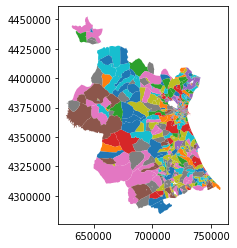

In [21]:
shapefile.plot(column='income')

In [22]:
df = pd.read_csv('../Grades/dataSet.csv')

In [23]:
import re
import utm
i=0
df["lat"]=df["coordinate"]
df.lat = df.lat.astype(str)
while i < len(df):
    df.at[i,"lat"]= df.loc[i,"coordinate"]
    df.at[i,"lat"]=re.sub("\[","", df.at[i,"lat"])
    df.at[i,"lat"]=re.sub(" ","", df.at[i,"lat"])
    df.at[i,"lat"]=re.sub("\]","", df.at[i,"lat"])
    df.at[i,"long"]=re.split(",", df.at[i,"lat"])[1]
    df.at[i,"lat"]=re.split(",", df.at[i,"lat"])[0]
    i=i+1
#geometry = [Point(xy) for xy in zip(cities['longitude'], cities['latitude'])]
df.lat = df.lat.astype(float)
df.long = df.long.astype(float)


In [ ]:
from shapely.geometry import Point
import utm
#geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
i=0
df["CUSEC"]=np.nan
while i < len(df):
    j=0
    while j<len(shapefile):
        if shapefile.loc[j,"geometry"].intersects(Point(utm.from_latlon(df.loc[i,"lat"],df.loc[i,"long"]))):
            df.at[i,"CUSEC"]=shapefile.loc[j,"CUSEC"]
            j=len(shapefile)
            print(i)
        #print(type((df.loc[i,"coordinate"])))
        j=j+1
    i=i+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
215
216
217
218
219
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
240
241
242
243
245


In [ ]:
df.isna().sum()

In [ ]:
df.to_csv('dataSet.csv')